# Analyse habit results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["figure.figsize"] = (6,4)

In [2]:
def plot_mean_and_95_ci(dfs, group_by_col, col_to_plot, plot_labels, x_label=None, y_label=None, title=None, save_path=None):

    for n in range(len(dfs)):
        df = dfs[n]
        plot_label = plot_labels[n]

        mu = df[[col_to_plot, group_by_col]].groupby(group_by_col).mean()
        sigma = df[[col_to_plot, group_by_col]].groupby(group_by_col).std()

        y1 = mu[col_to_plot]
        y_max = (mu + 1.96 * sigma/np.sqrt(50))[col_to_plot]
        y_min = (mu - 1.96 * sigma/np.sqrt(50))[col_to_plot]
        x = np.arange(len(y1))

        plt.plot(x, y1, label=plot_label)
        plt.fill_between(x, y_max, y_min, where=(y_max > y_min), alpha=0.2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")


def plot_median_and_95_ci(dfs, group_by_col, col_to_plot, plot_labels, x_label=None, y_label=None, title=None):

    for n in range(len(dfs)):
        df = dfs[n]
        plot_label = plot_labels[n]

        median = df[[col_to_plot, group_by_col]].groupby(group_by_col).median()
        mu = df[[col_to_plot, group_by_col]].groupby(group_by_col).mean()
        sigma = df[[col_to_plot, group_by_col]].groupby(group_by_col).std()

        y1 = median[col_to_plot]
        y_max = (mu + 1.96 * sigma/np.sqrt(50))[col_to_plot]
        y_min = (mu - 1.96 * sigma/np.sqrt(50))[col_to_plot]
        x = np.arange(len(y1))

        plt.plot(x, y1, label=plot_label)
        plt.fill_between(x, y_max, y_min, where=(y_max > y_min), alpha=0.2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

## Impact of Replay

In [3]:
base_replay_and_during = pd.read_csv("../experiment_results/base_EFE_replay_and_during_agent_results.csv")
base_no_replay = pd.read_csv("../experiment_results/base_EFE_train_only_during_episode_agent_results.csv")
base_only_replay = pd.read_csv("../experiment_results/base_EFE_only_replay_agent_results.csv")

In [4]:
base_only_replay

,Unnamed: 0,episode,success,sim_steps,VFE_post_run,noise_stddev,percent_use_fast_thinking,total_reward,agent_time_ratio,agent_id
0,0,0,False,999,71.450752,"[0.05, 0.05]",0.0,-14.092658,6,0
1,1,1,True,229,52.220207,"[0.05, 0.05]",0.0,96.527537,6,0
2,2,2,True,272,47.700012,"[0.05, 0.05]",0.0,96.419790,6,0
3,3,3,True,594,45.795498,"[0.05, 0.05]",0.0,90.308601,6,0
4,4,4,True,160,101.349892,"[0.05, 0.05]",0.0,97.958127,6,0
...,...,...,...,...,...,...,...,...,...,...
7495,7495,145,True,126,62.931271,"[0.05, 0.05]",0.0,98.148225,6,49
7496,7496,146,True,85,69.573029,"[0.05, 0.05]",0.0,98.774447,6,49
7497,7497,147,True,123,73.313248,"[0.05, 0.05]",0.0,98.252981,6,49
7498,7498,148,True,249,74.239426,"[0.05, 0.05]",0.0,96.285536,6,49


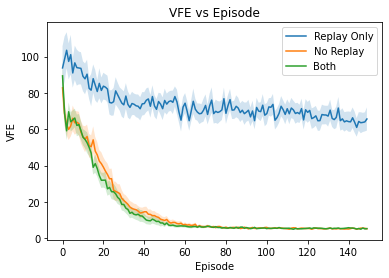

In [5]:
# plot_mean_and_95_ci([base_only_replay, base_replay_and_during], group_by_col="episode", col_to_plot="VFE_post_run", plot_labels=["Replay Only", "Both"], x_label="Episode", y_label="VFE", title="VFE vs Episode")

plot_mean_and_95_ci([base_only_replay, base_no_replay, base_replay_and_during], group_by_col="episode", col_to_plot="VFE_post_run", plot_labels=["Replay Only", "No Replay", "Both"], x_label="Episode", y_label="VFE", title="VFE vs Episode", save_path="../images/replay_vs_during_VFE.jpg")

In [6]:
# plt.plot(base_no_replay[["episode", "VFE_post_run"]].groupby("episode").mean(), label="Explore Only")
# plt.plot(base_with_replay[["episode", "VFE_post_run"]].groupby("episode").mean(), label="Replay + Explore")
# plt.plot(base_only_replay[["episode", "VFE_post_run"]].groupby("episode").mean(), label="Replay Only")
# plt.xlabel("Episode")
# plt.ylabel("VFE")
# plt.title("VFE vs Episode")
# plt.legend()

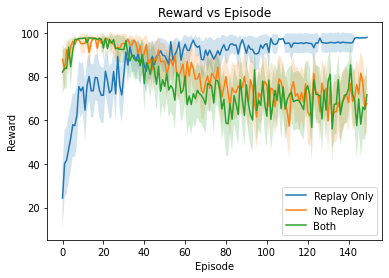

In [7]:
# plot_mean_and_95_ci([base_only_replay, base_replay_and_during], group_by_col="episode", col_to_plot="total_reward", plot_labels=["Replay Only", "Both"], x_label="Episode", y_label="Reward", title="Reward vs Episode")

plot_mean_and_95_ci([base_only_replay, base_no_replay, base_replay_and_during], group_by_col="episode", col_to_plot="total_reward", plot_labels=["Replay Only", "No Replay", "Both"], x_label="Episode", y_label="Reward", title="Reward vs Episode", save_path="../images/replay_vs_during_REWARD.jpg")

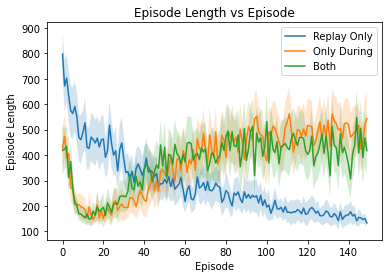

In [8]:
# plot_mean_and_95_ci([base_only_replay, base_replay_and_during], group_by_col="episode", col_to_plot="sim_steps", plot_labels=["Replay Only", "Both"], x_label="Episode", y_label="Episode Length", title="Episode Length vs Episode")

plot_mean_and_95_ci([base_only_replay, base_no_replay, base_replay_and_during], group_by_col="episode", col_to_plot="sim_steps", plot_labels=["Replay Only", "Only During", "Both"], x_label="Episode", y_label="Episode Length", title="Episode Length vs Episode", save_path="../images/replay_vs_during_EP_LENGTH.jpg")

## Stopping VAE

In [9]:
no_prior = pd.read_csv("../experiment_results/VAE_halting_EFE_agent_results.csv")
halt_with_prior = pd.read_csv("../experiment_results/VAE_halting_with_prior_model_agent_results.csv")
halt_with_prior

,Unnamed: 0,episode,success,sim_steps,VFE_post_run,noise_stddev,percent_use_fast_thinking,total_reward,agent_time_ratio,agent_id
0,0,0,False,999,69.310448,"[0.05, 0.05]",0.0,-13.093690,6,0
1,1,1,True,623,63.464619,"[0.05, 0.05]",0.0,91.430793,6,0
2,2,2,False,999,47.142025,"[0.05, 0.05]",0.0,-13.263908,6,0
3,3,3,True,800,54.659214,"[0.05, 0.05]",0.0,89.808397,6,0
4,4,4,True,127,85.532867,"[0.05, 0.05]",0.0,98.033755,6,0
...,...,...,...,...,...,...,...,...,...,...
7495,7495,145,True,105,8.365190,"[0.05, 0.05]",0.0,98.369853,6,49
7496,7496,146,True,109,10.080017,"[0.05, 0.05]",0.0,98.247917,6,49
7497,7497,147,True,97,8.726378,"[0.05, 0.05]",0.0,98.568276,6,49
7498,7498,148,True,113,7.893639,"[0.05, 0.05]",0.0,98.339866,6,49


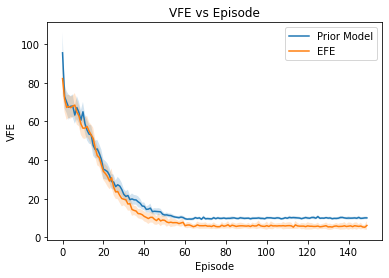

In [10]:
plot_mean_and_95_ci([halt_with_prior, no_prior], group_by_col="episode", col_to_plot="VFE_post_run", plot_labels=["Prior Model", "EFE"], x_label="Episode", y_label="VFE", title="VFE vs Episode", save_path="../images/halting_VAE_VFE.jpg")

In [11]:
# plt.plot(no_prior[["episode", "VFE_post_run"]].groupby("episode").mean(), label="EFE")
# plt.plot(with_prior[["episode", "VFE_post_run"]].groupby("episode").mean(), label="Prior Model")
# plt.xlabel("Episode")
# plt.ylabel("VFE")
# plt.title("VFE vs Episode")
# plt.legend()

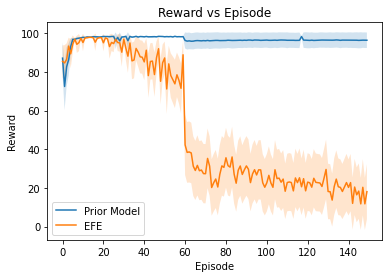

In [12]:
plot_mean_and_95_ci([halt_with_prior, no_prior], group_by_col="episode", col_to_plot="total_reward", plot_labels=["Prior Model", "EFE"], x_label="Episode", y_label="Reward", title="Reward vs Episode", save_path="../images/halting_VAE_REWARD.jpg")

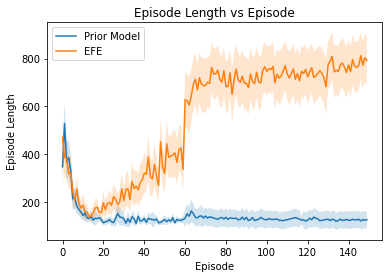

In [13]:
plot_mean_and_95_ci([halt_with_prior, no_prior], group_by_col="episode", col_to_plot="sim_steps", plot_labels=["Prior Model", "EFE"], x_label="Episode", y_label="Episode Length", title="Episode Length vs Episode", save_path="../images/halting_VAE_EP_LENGTH.jpg")

## Habit Actions With Flipped Dynamics

In [32]:
res_a2c = pd.read_csv("../experiment_results/A2C_from_start_flipped_agent_results.csv")
hab_a2c = pd.read_csv("../experiment_results/A2C_from_start_flipped_habit_results.csv")

# res_a2c_no_ex = pd.read_csv("../experiment_results/A2C_train_from_start_no_EFE_extrinsic_agent_results.csv")
# hab_a2c_no_ex = pd.read_csv("../experiment_results/A2C_train_from_start_no_EFE_extrinsic_habit_results.csv")
res_ddpg = pd.read_csv("../experiment_results/DDPG_from_start_flipped_agent_results.csv")
hab_ddpg = pd.read_csv("../experiment_results/DDPG_from_start_flipped_habit_results.csv")

res_a2c_late_state = pd.read_csv("../experiment_results/A2C_train_after_VAE_flipped_agent_results.csv")
hab_a2c_late_state = pd.read_csv("../experiment_results/A2C_train_after_VAE_flipped_habit_results.csv")

res_ddpg_500 = pd.read_csv("../experiment_results/DDPG_from_start_flipped_500_buffer_agent_results.csv")
hab_ddpg_500 = pd.read_csv("../experiment_results/DDPG_from_start_flipped_500_buffer_habit_results.csv")

In [15]:
res_a2c

,Unnamed: 0,episode,success,sim_steps,VFE_post_run,noise_stddev,percent_use_fast_thinking,total_reward,agent_time_ratio,agent_id
0,0,0,False,999,33.724888,"[0.05, 0.05]",0.023952,-14.021933,6,0
1,1,1,True,119,61.483601,"[0.05, 0.05]",0.100000,98.347404,6,0
2,2,2,True,685,46.458851,"[0.05, 0.05]",0.017391,90.179188,6,0
3,3,3,True,193,45.966797,"[0.05, 0.05]",0.060606,97.091278,6,0
4,4,4,True,215,86.072975,"[0.05, 0.05]",0.000000,96.919285,6,0
...,...,...,...,...,...,...,...,...,...,...
7495,7495,145,True,327,8.070933,"[0.05, 0.05]",0.472727,98.024333,6,49
7496,7496,146,True,226,7.996828,"[0.05, 0.05]",0.526316,98.736496,6,49
7497,7497,147,True,378,5.542978,"[0.05, 0.05]",0.619048,98.635146,6,49
7498,7498,148,True,502,4.788860,"[0.05, 0.05]",0.761905,98.302102,6,49


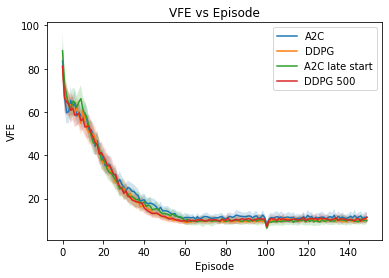

In [33]:
plot_mean_and_95_ci([res_a2c, res_ddpg, res_a2c_late_state, res_ddpg_500], group_by_col="episode", col_to_plot="VFE_post_run", plot_labels=["A2C", "DDPG", "A2C late start", "DDPG 500"], x_label="Episode", y_label="VFE", title="VFE vs Episode", save_path="../images/habit_nets_VFE.jpg")

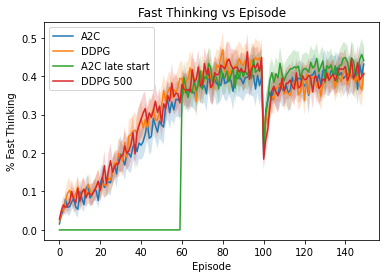

In [34]:
plot_mean_and_95_ci([res_a2c, res_ddpg, res_a2c_late_state, res_ddpg_500], group_by_col="episode", col_to_plot="percent_use_fast_thinking", plot_labels=["A2C", "DDPG", "A2C late start", "DDPG 500"], x_label="Episode", y_label="% Fast Thinking", title="Fast Thinking vs Episode", save_path="../images/habit_nets_PERCENT_FAST_THINKING.jpg")

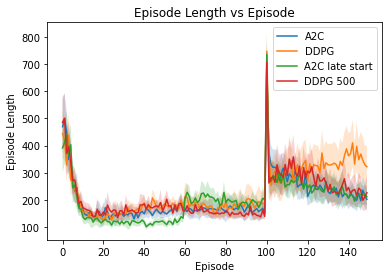

In [35]:
plot_mean_and_95_ci([res_a2c, res_ddpg, res_a2c_late_state, res_ddpg_500], group_by_col="episode", col_to_plot="sim_steps", plot_labels=["A2C", "DDPG", "A2C late start", "DDPG 500"], x_label="Episode", y_label="Episode Length", title="Episode Length vs Episode", save_path="../images/habit_nets_EP_LENGTH.jpg")

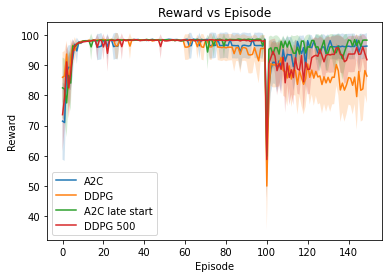

In [36]:
plot_mean_and_95_ci([res_a2c, res_ddpg, res_a2c_late_state, res_ddpg_500], group_by_col="episode", col_to_plot="total_reward", plot_labels=["A2C", "DDPG", "A2C late start", "DDPG 500"], x_label="Episode", y_label="Reward", title="Reward vs Episode", save_path="../images/habit_nets_REWARD.jpg")

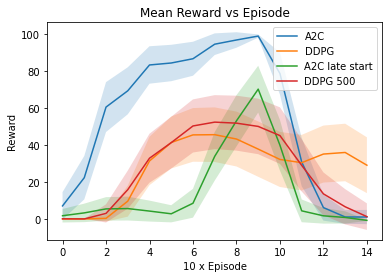

In [37]:
plot_mean_and_95_ci([hab_a2c, hab_ddpg, hab_a2c_late_state, hab_ddpg_500], group_by_col="run_num", col_to_plot="reward", plot_labels=["A2C", "DDPG", "A2C late start", "DDPG 500"], x_label="10 x Episode", y_label="Reward", title="Mean Reward vs Episode", save_path="../images/habit_model_REWARD.jpg")

In [21]:
# plt.plot(hab_a2c_no_ex[["reward", "run_num"]].groupby("run_num").median(), label="A2C")
# plt.plot(hab_a2c_late_state[["reward", "run_num"]].groupby("run_num").median(), label="A2C late start")
# plt.plot(hab_ddpg_no_ex[["reward", "run_num"]].groupby("run_num").median(), label="DDPG")
# plt.plot(hab_a2c[["reward", "run_num"]].groupby("run_num").median(), label="A2C + extrinsic")
# plt.xlabel("10 x Episode")
# plt.ylabel("Reward")
# plt.title("Median Reward vs Episode")
# plt.legend()

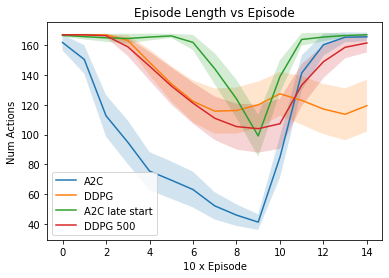

In [38]:
plot_mean_and_95_ci([hab_a2c, hab_ddpg, hab_a2c_late_state, hab_ddpg_500], group_by_col="run_num", col_to_plot="num_actions", plot_labels=["A2C", "DDPG", "A2C late start", "DDPG 500"], x_label="10 x Episode", y_label="Num Actions", title="Episode Length vs Episode", save_path="../images/habit_model_NUM_ACTIONS.jpg")

## Long Term Runs Without Flipping Dynamics

In [23]:
# res_a2c_long = pd.read_csv("../experiment_results/A2C_long_run_no_EFE_extrinsic_agent_results.csv")
# hab_a2c_long = pd.read_csv("../experiment_results/A2C_long_run_no_EFE_extrinsic_habit_results.csv")
# res_ddpg_long = pd.read_csv("../experiment_results/DDPG_long_run_no_EFE_extrinsic_agent_results.csv")
# hab_ddpg_long = pd.read_csv("../experiment_results/DDPG_long_run_no_EFE_extrinsic_habit_results.csv")

res_a2c_long = pd.read_csv("../experiment_results/A2C_long_run_agent_results.csv")
hab_a2c_long = pd.read_csv("../experiment_results/A2C_long_run_habit_results.csv")
res_ddpg_long = pd.read_csv("../experiment_results/DDPG_long_run_agent_results.csv")
hab_ddpg_long = pd.read_csv("../experiment_results/DDPG_long_run_habit_results.csv")

res_ddpg_long_500 = pd.read_csv("../experiment_results/DDPG_long_run_500_buffer_agent_results.csv")
hab_ddpg_long_500 = pd.read_csv("../experiment_results/DDPG_long_run_500_buffer_habit_results.csv")

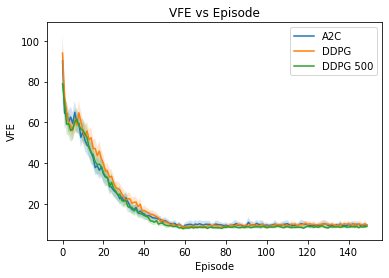

In [25]:
plot_mean_and_95_ci([res_a2c_long, res_ddpg_long, res_ddpg_long_500], group_by_col="episode", col_to_plot="VFE_post_run", plot_labels=["A2C", "DDPG", "DDPG 500"], x_label="Episode", y_label="VFE", title="VFE vs Episode", save_path="../images/habit_nets_long_VFE.jpg")

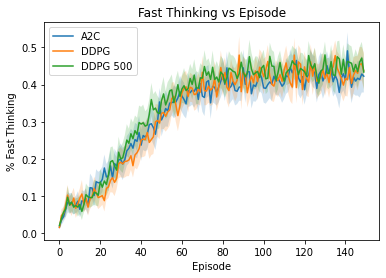

In [26]:
plot_mean_and_95_ci([res_a2c_long, res_ddpg_long, res_ddpg_long_500], group_by_col="episode", col_to_plot="percent_use_fast_thinking", plot_labels=["A2C", "DDPG", "DDPG 500"], x_label="Episode", y_label="% Fast Thinking", title="Fast Thinking vs Episode", save_path="../images/habit_nets_long_PERCENT_FAST_THINKING.jpg")

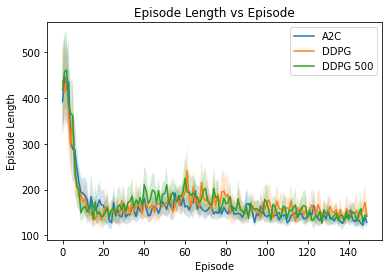

In [28]:
plot_mean_and_95_ci([res_a2c_long, res_ddpg_long, res_ddpg_long_500], group_by_col="episode", col_to_plot="sim_steps", plot_labels=["A2C", "DDPG", "DDPG 500"], x_label="Episode", y_label="Episode Length", title="Episode Length vs Episode", save_path="../images/habit_nets_long_EP_LENGTH.jpg")

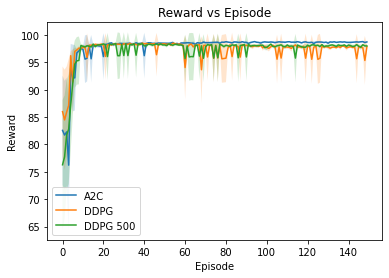

In [29]:
plot_mean_and_95_ci([res_a2c_long, res_ddpg_long, res_ddpg_long_500], group_by_col="episode", col_to_plot="total_reward", plot_labels=["A2C", "DDPG", "DDPG 500"], x_label="Episode", y_label="Reward", title="Reward vs Episode", save_path="../images/habit_nets_long_REWARD.jpg")

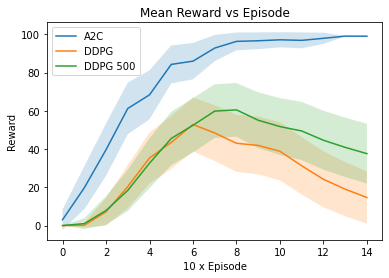

In [30]:
plot_mean_and_95_ci([hab_a2c_long, hab_ddpg_long, hab_ddpg_long_500], group_by_col="run_num", col_to_plot="reward", plot_labels=["A2C", "DDPG", "DDPG 500"], x_label="10 x Episode", y_label="Reward", title="Mean Reward vs Episode", save_path="../images/habit_model_long_REWARD.jpg")

In [89]:
# plot_median_and_95_ci([hab_a2c_long, hab_ddpg_long], group_by_col="run_num", col_to_plot="reward", plot_labels=["A2C", "DDPG"], x_label="10 x Episode", y_label="Reward", title="Mean Reward vs Episode")

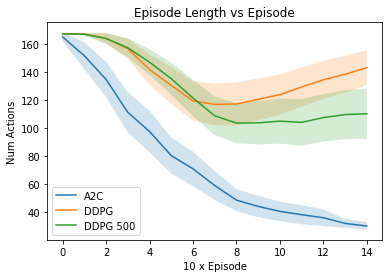

In [31]:
plot_mean_and_95_ci([hab_a2c_long, hab_ddpg_long, hab_ddpg_long_500], group_by_col="run_num", col_to_plot="num_actions", plot_labels=["A2C", "DDPG", "DDPG 500"], x_label="10 x Episode", y_label="Num Actions", title="Episode Length vs Episode", save_path="../images/habit_model_long_EP_LENGTH.jpg")

## Comparison to Standard Method

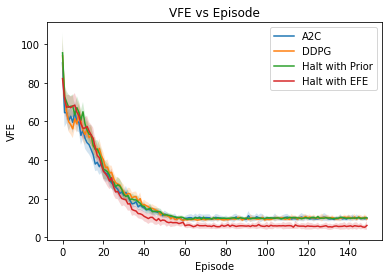

In [91]:
plot_mean_and_95_ci([res_a2c_long, res_ddpg_long, halt_with_prior, no_prior], group_by_col="episode", col_to_plot="VFE_post_run", plot_labels=["A2C", "DDPG", "Halt with Prior", "Halt with EFE"], x_label="Episode", y_label="VFE", title="VFE vs Episode", save_path="../images/comparison_VFE.jpg")

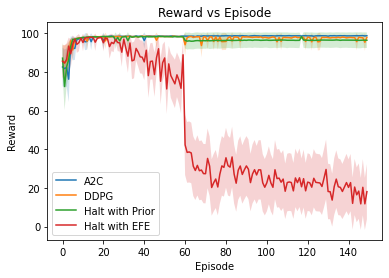

In [92]:
plot_mean_and_95_ci([res_a2c_long, res_ddpg_long, halt_with_prior, no_prior], group_by_col="episode", col_to_plot="total_reward", plot_labels=["A2C", "DDPG", "Halt with Prior", "Halt with EFE"], x_label="Episode", y_label="Reward", title="Reward vs Episode", save_path="../images/comparison_REWARD.jpg")

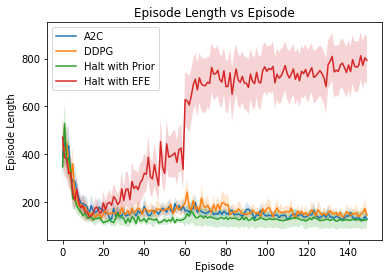

In [93]:
plot_mean_and_95_ci([res_a2c_long, res_ddpg_long, halt_with_prior, no_prior], group_by_col="episode", col_to_plot="sim_steps", plot_labels=["A2C", "DDPG", "Halt with Prior", "Halt with EFE"], x_label="Episode", y_label="Episode Length", title="Episode Length vs Episode", save_path="../images/comparison_EP_LENGTH.jpg")